KELOMPOK 15 DATA WRANGLING

KELAS 2024E

NAMA:
1. BIMA SETIA SUGIHARTO (24031554040)
2. SHOLIKIN (24031554098)


***CLENANING DATA***


In [3]:
import pandas as pd

In [4]:
# DATASET
df_2023 = pd.read_csv('spotify-2023.csv', encoding='latin-1')
df_2024 = pd.read_csv('spotify-2024.csv', encoding='latin-1')

In [108]:
q=list(df_2024)
q

['track',
 'artist',
 'spotify_streams',
 'spotify_playlist',
 'spotify_charts',
 'apple_playlist',
 'deezer_playlist',
 'deezer_charts',
 'shazam_charts',
 'datetime']

In [6]:

df_2023.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [7]:
df_2023.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [8]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [9]:
df_2023.shape

(953, 24)

In [10]:
columns_to_drop = ['key', 'bpm', 'mode', 'liveness_%', 'speechiness_%', 'artist_count',
                   'danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%', "in_apple_charts"]

df_2023 = df_2023.drop(columns=columns_to_drop)
print("Remaining columns:", df_2023.columns.tolist())

Remaining columns: ['track_name', 'artist(s)_name', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']


In [11]:
list(df_2023)

['track_name',
 'artist(s)_name',
 'released_year',
 'released_month',
 'released_day',
 'in_spotify_playlists',
 'in_spotify_charts',
 'streams',
 'in_apple_playlists',
 'in_deezer_playlists',
 'in_deezer_charts',
 'in_shazam_charts']

In [12]:
df_2023.head()

,track_name,artist(s)_name,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_deezer_playlists,in_deezer_charts,in_shazam_charts
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2023,7,14,553,147,141381703,43,45,10,826
1,LALA,Myke Towers,2023,3,23,1474,48,133716286,48,58,14,382
2,vampire,Olivia Rodrigo,2023,6,30,1397,113,140003974,94,91,14,949
3,Cruel Summer,Taylor Swift,2019,8,23,7858,100,800840817,116,125,12,548
4,WHERE SHE GOES,Bad Bunny,2023,5,18,3133,50,303236322,84,87,15,425


In [13]:
rename = df_2023.rename(columns={
    "track_name": "track",
    "artist(s)_name": "artist",
    "Release Date": "release_date",
    "in_spotify_playlists": "spotify_playlist",
    "in_spotify_charts": "spotify_charts",
    "streams": "spotify_streams",
    "in_apple_playlists": "apple_playlist",
    "in_deezer_playlists": "deezer_playlist",
    "in_deezer_charts": "deezer_charts",
    "in_shazam_charts": "shazam_charts"

})

df_2023 = rename

In [14]:
list(df_2023)

['track',
 'artist',
 'released_year',
 'released_month',
 'released_day',
 'spotify_playlist',
 'spotify_charts',
 'spotify_streams',
 'apple_playlist',
 'deezer_playlist',
 'deezer_charts',
 'shazam_charts']

In [15]:
df_2023.isna().sum()

track                0
artist               0
released_year        0
released_month       0
released_day         0
spotify_playlist     0
spotify_charts       0
spotify_streams      0
apple_playlist       0
deezer_playlist      0
deezer_charts        0
shazam_charts       50
dtype: int64

In [16]:
exclude_cols = ["track", "artist"]
num_cols = ["shazam_charts"]

for col in df_2023.columns:
    if col not in exclude_cols:
        df_2023[col] = (
            df_2023[col]
            .astype(str)
            .str.replace(",", "", regex=False)
            .apply(pd.to_numeric, errors="coerce")
        )
df_2023 = df_2023.astype({col: "float64" for col in df_2023.select_dtypes(include=["int"]).columns})

for col in num_cols:
    if col in df_2023.columns:
        df_2023[col].fillna(df_2023[col].median(), inplace=True)

cols_to_fill = ["spotify_streams"]
for col in cols_to_fill:
    if col in df_2023.columns:
        median_value = df_2023[col].median()
        df_2023[col] = df_2023[col].fillna(median_value)

df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             953 non-null    object 
 1   artist            953 non-null    object 
 2   released_year     953 non-null    float64
 3   released_month    953 non-null    float64
 4   released_day      953 non-null    float64
 5   spotify_playlist  953 non-null    float64
 6   spotify_charts    953 non-null    float64
 7   spotify_streams   953 non-null    float64
 8   apple_playlist    953 non-null    float64
 9   deezer_playlist   953 non-null    float64
 10  deezer_charts     953 non-null    float64
 11  shazam_charts     953 non-null    float64
dtypes: float64(10), object(2)
memory usage: 89.5+ KB


C:\Users\sholikin\AppData\Local\Temp\ipykernel_29348\911250141.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2023[col].fillna(df_2023[col].median(), inplace=True)


In [17]:
df_2023.head()

,track,artist,released_year,released_month,released_day,spotify_playlist,spotify_charts,spotify_streams,apple_playlist,deezer_playlist,deezer_charts,shazam_charts
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2023.0,7.0,14.0,553.0,147.0,141381703.0,43.0,45.0,10.0,826.0
1,LALA,Myke Towers,2023.0,3.0,23.0,1474.0,48.0,133716286.0,48.0,58.0,14.0,382.0
2,vampire,Olivia Rodrigo,2023.0,6.0,30.0,1397.0,113.0,140003974.0,94.0,91.0,14.0,949.0
3,Cruel Summer,Taylor Swift,2019.0,8.0,23.0,7858.0,100.0,800840817.0,116.0,125.0,12.0,548.0
4,WHERE SHE GOES,Bad Bunny,2023.0,5.0,18.0,3133.0,50.0,303236322.0,84.0,87.0,15.0,425.0


data 2024


In [18]:
df_2024 = pd.read_csv('spotify-2024.csv', encoding='latin-1')
df_2024.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [19]:
df_2024.isna().sum()

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity              4600
Explicit Track      

In [20]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [21]:
df_2024.shape

(4600, 29)

In [22]:
columns_to_drop = ['Spotify Popularity', 'ISRC', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes',
                    'All Time Rank', 'TikTok Views', 'YouTube Playlist Reach', 'AirPlay Spins', 'SiriusXM Spins',
                    'Album Name', 'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
                    'Track Score', 'Soundcloud Streams', 'TIDAL Popularity', 'Explicit Track']

df_2024 = df_2024.drop(columns=columns_to_drop)
print("Remaining columns:", df_2024.columns.tolist())

Remaining columns: ['Track', 'Artist', 'Release Date', 'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'Apple Music Playlist Count', 'Deezer Playlist Count', 'Deezer Playlist Reach', 'Shazam Counts']


In [23]:
list(df_2024)

['Track',
 'Artist',
 'Release Date',
 'Spotify Streams',
 'Spotify Playlist Count',
 'Spotify Playlist Reach',
 'Apple Music Playlist Count',
 'Deezer Playlist Count',
 'Deezer Playlist Reach',
 'Shazam Counts']

In [24]:
rename = df_2024.rename(columns={
    "Track": "track",
    "Artist": "artist",
    "Release Date": "release_date",
    "Spotify Streams": "spotify_streams",
    "Spotify Playlist Count": "spotify_playlist",
    "Spotify Playlist Reach": "spotify_charts",
    "Deezer Playlist Count": "deezer_playlist",
    "Deezer Playlist Reach": "deezer_charts",
    "Shazam Counts": "shazam_charts",
    "Apple Music Playlist Count": "apple_playlist",
})

df_2024 = rename

In [25]:
df_2024["release_date"] = pd.to_datetime(df_2024["release_date"], errors="coerce")
df_2024["released_year"] = df_2024["release_date"].dt.year
df_2024["released_month"] = df_2024["release_date"].dt.month
df_2024["released_day"] = df_2024["release_date"].dt.day

df_2024 = df_2024.drop(columns=["release_date"])
df_2024.head()

,track,artist,spotify_streams,spotify_playlist,spotify_charts,apple_playlist,deezer_playlist,deezer_charts,shazam_charts,released_year,released_month,released_day
0,MILLION DOLLAR BABY,Tommy Richman,"390,470,936","30,716","196,631,588",210.0,62.0,"17,598,718","2,669,262",2024,4,26
1,Not Like Us,Kendrick Lamar,"323,703,884","28,113","174,597,137",188.0,67.0,"10,422,430","1,118,279",2024,5,4
2,i like the way you kiss me,Artemas,"601,309,283","54,331","211,607,669",190.0,136.0,"36,321,847","5,285,340",2024,3,19
3,Flowers,Miley Cyrus,"2,031,280,633","269,802","136,569,078",394.0,264.0,"24,684,248","11,822,942",2023,1,12
4,Houdini,Eminem,"107,034,922","7,223","151,469,874",182.0,82.0,"17,660,624","457,017",2024,5,31


data kosong isi dengan median

In [26]:
df_2024.isna().sum()

track                 0
artist                5
spotify_streams     113
spotify_playlist     70
spotify_charts       72
apple_playlist      561
deezer_playlist     921
deezer_charts       928
shazam_charts       577
released_year         0
released_month        0
released_day          0
dtype: int64

In [27]:
num_cols = [
    "spotify_streams",
    "spotify_playlist",
    "spotify_charts",
    "apple_playlist",
    "deezer_playlist",
    "deezer_charts",
    "shazam_charts"
]

for col in num_cols:
    if col in df_2024.columns:
        df_2024[col] = df_2024[col].astype(str).str.replace(",", "").astype(float)

for col in num_cols:
    if col in df_2024.columns:
        df_2024[col].fillna(df_2024[col].median(), inplace=True)

if "artist" in df_2024.columns:
    df_2024["artist"].fillna("Unknown", inplace=True)

df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             4600 non-null   object 
 1   artist            4600 non-null   object 
 2   spotify_streams   4600 non-null   float64
 3   spotify_playlist  4600 non-null   float64
 4   spotify_charts    4600 non-null   float64
 5   apple_playlist    4600 non-null   float64
 6   deezer_playlist   4600 non-null   float64
 7   deezer_charts     4600 non-null   float64
 8   shazam_charts     4600 non-null   float64
 9   released_year     4600 non-null   int32  
 10  released_month    4600 non-null   int32  
 11  released_day      4600 non-null   int32  
dtypes: float64(7), int32(3), object(2)
memory usage: 377.5+ KB


C:\Users\sholikin\AppData\Local\Temp\ipykernel_29348\6616859.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2024[col].fillna(df_2024[col].median(), inplace=True)
C:\Users\sholikin\AppData\Local\Temp\ipykernel_29348\6616859.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [28]:
df_2024

,track,artist,spotify_streams,spotify_playlist,spotify_charts,apple_playlist,deezer_playlist,deezer_charts,shazam_charts,released_year,released_month,released_day
0,MILLION DOLLAR BABY,Tommy Richman,3.904709e+08,30716.0,196631588.0,210.0,62.0,17598718.0,2669262.0,2024,4,26
1,Not Like Us,Kendrick Lamar,3.237039e+08,28113.0,174597137.0,188.0,67.0,10422430.0,1118279.0,2024,5,4
2,i like the way you kiss me,Artemas,6.013093e+08,54331.0,211607669.0,190.0,136.0,36321847.0,5285340.0,2024,3,19
3,Flowers,Miley Cyrus,2.031281e+09,269802.0,136569078.0,394.0,264.0,24684248.0,11822942.0,2023,1,12
4,Houdini,Eminem,1.070349e+08,7223.0,151469874.0,182.0,82.0,17660624.0,457017.0,2024,5,31
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,$uicideboy$,3.050500e+08,65770.0,5103054.0,3.0,2.0,14217.0,656337.0,2017,9,5
4596,Dil Meri Na Sune,Atif Aslam,5.228236e+07,4602.0,1449767.0,1.0,1.0,927.0,193590.0,2018,7,27
4597,Grace (feat. 42 Dugg),Lil Baby,1.899727e+08,72066.0,6704802.0,19.0,1.0,74.0,1135998.0,2020,2,28
4598,Nashe Si Chadh Gayi,Arijit Singh,1.454670e+08,14037.0,7387064.0,1.0,15.0,237120.5,448292.0,2016,11,8


**INTEGRASI DATA**


In [29]:
df_2023.head()

,track,artist,released_year,released_month,released_day,spotify_playlist,spotify_charts,spotify_streams,apple_playlist,deezer_playlist,deezer_charts,shazam_charts
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2023.0,7.0,14.0,553.0,147.0,141381703.0,43.0,45.0,10.0,826.0
1,LALA,Myke Towers,2023.0,3.0,23.0,1474.0,48.0,133716286.0,48.0,58.0,14.0,382.0
2,vampire,Olivia Rodrigo,2023.0,6.0,30.0,1397.0,113.0,140003974.0,94.0,91.0,14.0,949.0
3,Cruel Summer,Taylor Swift,2019.0,8.0,23.0,7858.0,100.0,800840817.0,116.0,125.0,12.0,548.0
4,WHERE SHE GOES,Bad Bunny,2023.0,5.0,18.0,3133.0,50.0,303236322.0,84.0,87.0,15.0,425.0


In [30]:
df_2023.dropna(inplace=True)

In [31]:
# cek paanjang df_2023
len(df_2023)

953

In [32]:
df_2024.head()

,track,artist,spotify_streams,spotify_playlist,spotify_charts,apple_playlist,deezer_playlist,deezer_charts,shazam_charts,released_year,released_month,released_day
0,MILLION DOLLAR BABY,Tommy Richman,3.904709e+08,30716.0,196631588.0,210.0,62.0,17598718.0,2669262.0,2024,4,26
1,Not Like Us,Kendrick Lamar,3.237039e+08,28113.0,174597137.0,188.0,67.0,10422430.0,1118279.0,2024,5,4
2,i like the way you kiss me,Artemas,6.013093e+08,54331.0,211607669.0,190.0,136.0,36321847.0,5285340.0,2024,3,19
3,Flowers,Miley Cyrus,2.031281e+09,269802.0,136569078.0,394.0,264.0,24684248.0,11822942.0,2023,1,12
4,Houdini,Eminem,1.070349e+08,7223.0,151469874.0,182.0,82.0,17660624.0,457017.0,2024,5,31


In [33]:
df_2024.isna().sum()

track               0
artist              0
spotify_streams     0
spotify_playlist    0
spotify_charts      0
apple_playlist      0
deezer_playlist     0
deezer_charts       0
shazam_charts       0
released_year       0
released_month      0
released_day        0
dtype: int64

In [34]:
len(df_2024)

4600

In [35]:
list(df_2023.columns)


['track',
 'artist',
 'released_year',
 'released_month',
 'released_day',
 'spotify_playlist',
 'spotify_charts',
 'spotify_streams',
 'apple_playlist',
 'deezer_playlist',
 'deezer_charts',
 'shazam_charts']

In [36]:
# buat kolom datetime df_2023
rename = df_2023.rename(columns={
    "released_year":"year",
    "released_month" : "month",
    "released_day" : "day"
    })

df_2023 = rename

datetime_col =['year','month','day']
for col in datetime_col:
    df_2023[col] = df_2023[col].astype(int)


df_2023['datetime'] = pd.to_datetime(df_2023[datetime_col])
df_2023.drop(datetime_col,axis=1,inplace=True)

In [37]:
df_2023.head()

,track,artist,spotify_playlist,spotify_charts,spotify_streams,apple_playlist,deezer_playlist,deezer_charts,shazam_charts,datetime
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",553.0,147.0,141381703.0,43.0,45.0,10.0,826.0,2023-07-14
1,LALA,Myke Towers,1474.0,48.0,133716286.0,48.0,58.0,14.0,382.0,2023-03-23
2,vampire,Olivia Rodrigo,1397.0,113.0,140003974.0,94.0,91.0,14.0,949.0,2023-06-30
3,Cruel Summer,Taylor Swift,7858.0,100.0,800840817.0,116.0,125.0,12.0,548.0,2019-08-23
4,WHERE SHE GOES,Bad Bunny,3133.0,50.0,303236322.0,84.0,87.0,15.0,425.0,2023-05-18


In [38]:
list(df_2024.columns)

['track',
 'artist',
 'spotify_streams',
 'spotify_playlist',
 'spotify_charts',
 'apple_playlist',
 'deezer_playlist',
 'deezer_charts',
 'shazam_charts',
 'released_year',
 'released_month',
 'released_day']

In [39]:
# buat kolom datetime df_2024
rename = df_2024.rename(columns={
    "released_year":"year",
    "released_month" : "month",
    "released_day" : "day"
    })

df_2024 = rename

datetime_col =['year','month','day']
for col in datetime_col:
    df_2024[col] = df_2024[col].astype(int)


df_2024['datetime'] = pd.to_datetime(df_2024[datetime_col])
df_2024.drop(datetime_col,axis=1,inplace=True)

In [40]:
df_2024.head()

,track,artist,spotify_streams,spotify_playlist,spotify_charts,apple_playlist,deezer_playlist,deezer_charts,shazam_charts,datetime
0,MILLION DOLLAR BABY,Tommy Richman,3.904709e+08,30716.0,196631588.0,210.0,62.0,17598718.0,2669262.0,2024-04-26
1,Not Like Us,Kendrick Lamar,3.237039e+08,28113.0,174597137.0,188.0,67.0,10422430.0,1118279.0,2024-05-04
2,i like the way you kiss me,Artemas,6.013093e+08,54331.0,211607669.0,190.0,136.0,36321847.0,5285340.0,2024-03-19
3,Flowers,Miley Cyrus,2.031281e+09,269802.0,136569078.0,394.0,264.0,24684248.0,11822942.0,2023-01-12
4,Houdini,Eminem,1.070349e+08,7223.0,151469874.0,182.0,82.0,17660624.0,457017.0,2024-05-31


In [41]:
df = pd.concat([df_2023, df_2024], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5553 entries, 0 to 5552
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   track             5553 non-null   object        
 1   artist            5553 non-null   object        
 2   spotify_playlist  5553 non-null   float64       
 3   spotify_charts    5553 non-null   float64       
 4   spotify_streams   5553 non-null   float64       
 5   apple_playlist    5553 non-null   float64       
 6   deezer_playlist   5553 non-null   float64       
 7   deezer_charts     5553 non-null   float64       
 8   shazam_charts     5553 non-null   float64       
 9   datetime          5553 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 434.0+ KB


In [42]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

In [43]:
if (len(df_2023) + len(df_2024)) == len(df):
    print('panjang sudah sama')
else:
    print('panjang tidak sama')

panjang sudah sama


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5553 entries, 0 to 5552
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   track             5553 non-null   object        
 1   artist            5553 non-null   object        
 2   spotify_playlist  5553 non-null   float64       
 3   spotify_charts    5553 non-null   float64       
 4   spotify_streams   5553 non-null   float64       
 5   apple_playlist    5553 non-null   float64       
 6   deezer_playlist   5553 non-null   float64       
 7   deezer_charts     5553 non-null   float64       
 8   shazam_charts     5553 non-null   float64       
 9   datetime          5553 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 434.0+ KB


In [45]:
df.head()

,track,artist,spotify_playlist,spotify_charts,spotify_streams,apple_playlist,deezer_playlist,deezer_charts,shazam_charts,datetime
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",553.0,147.0,141381703.0,43.0,45.0,10.0,826.0,2023-07-14
1,LALA,Myke Towers,1474.0,48.0,133716286.0,48.0,58.0,14.0,382.0,2023-03-23
2,vampire,Olivia Rodrigo,1397.0,113.0,140003974.0,94.0,91.0,14.0,949.0,2023-06-30
3,Cruel Summer,Taylor Swift,7858.0,100.0,800840817.0,116.0,125.0,12.0,548.0,2019-08-23
4,WHERE SHE GOES,Bad Bunny,3133.0,50.0,303236322.0,84.0,87.0,15.0,425.0,2023-05-18


In [46]:
list(df.columns)

['track',
 'artist',
 'spotify_playlist',
 'spotify_charts',
 'spotify_streams',
 'apple_playlist',
 'deezer_playlist',
 'deezer_charts',
 'shazam_charts',
 'datetime']

In [47]:
# cek duplikat
df.duplicated().any()

True

In [48]:
df.duplicated().sum()

2

In [49]:
df[df.duplicated()]

,track,artist,spotify_playlist,spotify_charts,spotify_streams,apple_playlist,deezer_playlist,deezer_charts,shazam_charts,datetime
3403,Tennessee Orange,Megan Moroney,28139.0,12480714.0,227893586.0,33.0,5.0,1370.0,708143.0,2022-09-02
4403,Dembow,Danny Ocean,60397.0,11805084.0,579189526.0,34.0,20.0,37649.0,1619550.0,2017-12-08


In [50]:
df = df.drop_duplicates()

In [51]:
df.duplicated(subset=['track','artist','datetime','spotify_playlist','apple_playlist','deezer_playlist']).sum()


0

In [52]:
# data spotify
spotify = ['track','artist','datetime','spotify_streams','spotify_playlist']
df_spotify =df[spotify]

df_spotify.head()

,track,artist,datetime,spotify_streams,spotify_playlist
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2023-07-14,141381703.0,553.0
1,LALA,Myke Towers,2023-03-23,133716286.0,1474.0
2,vampire,Olivia Rodrigo,2023-06-30,140003974.0,1397.0
3,Cruel Summer,Taylor Swift,2019-08-23,800840817.0,7858.0
4,WHERE SHE GOES,Bad Bunny,2023-05-18,303236322.0,3133.0


In [53]:
# data apple
apple  = ['track','artist','datetime','apple_playlist']
df_aplle =df[apple]

df_aplle.head()

,track,artist,datetime,apple_playlist
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2023-07-14,43.0
1,LALA,Myke Towers,2023-03-23,48.0
2,vampire,Olivia Rodrigo,2023-06-30,94.0
3,Cruel Summer,Taylor Swift,2019-08-23,116.0
4,WHERE SHE GOES,Bad Bunny,2023-05-18,84.0


In [54]:
# data deezer

deezer  = ['track','artist','datetime','deezer_playlist','deezer_charts']
df_deezer =df[deezer]

df_deezer.head()

,track,artist,datetime,deezer_playlist,deezer_charts
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2023-07-14,45.0,10.0
1,LALA,Myke Towers,2023-03-23,58.0,14.0
2,vampire,Olivia Rodrigo,2023-06-30,91.0,14.0
3,Cruel Summer,Taylor Swift,2019-08-23,125.0,12.0
4,WHERE SHE GOES,Bad Bunny,2023-05-18,87.0,15.0


In [55]:
# data shazam
shazam  = ['track','artist','datetime','shazam_charts']
df_shazam =df[shazam]

df_shazam.head()

,track,artist,datetime,shazam_charts
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2023-07-14,826.0
1,LALA,Myke Towers,2023-03-23,382.0
2,vampire,Olivia Rodrigo,2023-06-30,949.0
3,Cruel Summer,Taylor Swift,2019-08-23,548.0
4,WHERE SHE GOES,Bad Bunny,2023-05-18,425.0


In [56]:
# dari data spotify
bygroup_spotify=df.groupby('artist')['spotify_playlist']

In [57]:
df1=bygroup_spotify.agg(['count', 'sum', 'mean', 'max', 'min'])
df1.rename(columns={'count':'banyaknya lagu'},inplace=True)
df1


,banyaknya lagu,sum,mean,max,min
artist,,,,,
"""XY""",1,1.0,1.000000,1.0,1.0
$OHO BANI,1,7779.0,7779.000000,7779.0,7779.0
$uicideboy$,9,414095.0,46010.555556,167727.0,1936.0
&ME,1,34272.0,34272.000000,34272.0,34272.0
(G)I-DLE,6,81249.0,13541.500000,26565.0,430.0
...,...,...,...,...,...
ýýýýýýýýýýýýýýý ýýýýýýýýýýýýýýý,1,128.0,128.000000,128.0,128.0
ýýýýýýýýýýýýýýý(ýýýýýýýýýýýýýýý),1,130.0,130.000000,130.0,130.0
ýýýýýýýýýýýýýýýýýý,1,1054.0,1054.000000,1054.0,1054.0


In [58]:
df1['min'].sort_values()

artist
"XY"                      1.0
Delifinger                1.0
Travis Scott              1.0
Afrian Af                 1.0
The Weeknd                1.0
                       ...   
Powfu                283938.0
24kGoldn             302486.0
SAINt JHN            323997.0
Milky Chance         331171.0
Foster The People    344490.0
Name: min, Length: 2411, dtype: float64

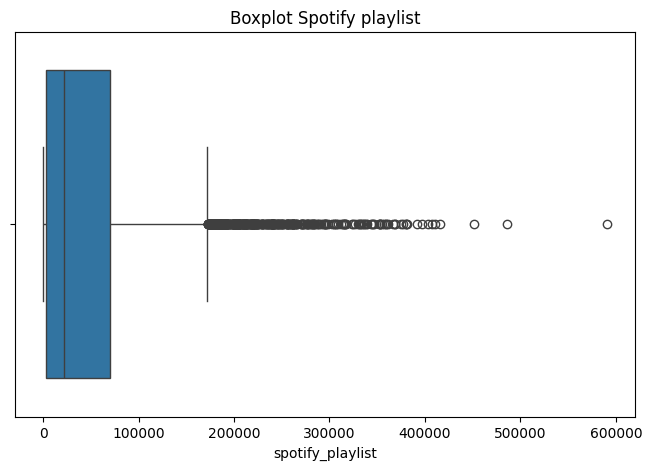

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x=df['spotify_playlist'])
plt.title('Boxplot Spotify playlist')
plt.show()


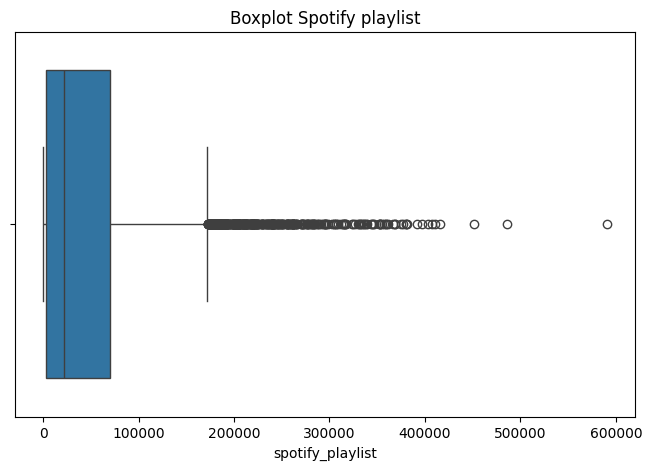

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x=df['spotify_playlist'])
plt.title('Boxplot Spotify playlist')
plt.show()

In [61]:
Q1 = df['spotify_playlist'].quantile(0.25)
Q3 = df['spotify_playlist'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data outlier
outliers = df[(df['spotify_playlist'] < lower_bound) | (df['spotify_playlist'] > upper_bound)]
print(outliers[['artist', 'spotify_playlist']])


                     artist  spotify_playlist
956             Miley Cyrus          269802.0
972            Harry Styles          407119.0
979           The Kid LAROI          451732.0
991                   Gunna          188142.0
992             Tones And I          375201.0
...                     ...               ...
5399          Calvin Harris          187432.0
5424  Red Hot Chili Peppers          203821.0
5475                Nirvana          410054.0
5510              Timbaland          177813.0
5528    Swedish House Mafia          203395.0

[391 rows x 2 columns]


In [62]:
bygroup_spotify.mean()

artist
"XY"                                               1.000000
$OHO BANI                                       7779.000000
$uicideboy$                                    46010.555556
&ME                                            34272.000000
(G)I-DLE                                       13541.500000
                                                   ...     
ýýýýýýýýýýýýýýý ýýýýýýýýýýýýýýý                  128.000000
ýýýýýýýýýýýýýýý(ýýýýýýýýýýýýýýý)                 130.000000
ýýýýýýýýýýýýýýýýýý                              1054.000000
ýýýýýýýýýýýýýýýýýýýýý ýýýýýýýýýýýýýýýýýýýýý       14.000000
ýýýýýýýýýýýýýýýýýýýýýýýý                         411.000000
Name: spotify_playlist, Length: 2411, dtype: float64

In [63]:
df['is_outlier'] = ((df['spotify_playlist'] < lower_bound) | (df['spotify_playlist'] > upper_bound))
df['is_outlier'].value_counts()

is_outlier
False    5160
True      391
Name: count, dtype: int64

In [64]:
df['is_outlier'] = ((df['shazam_charts'] < lower_bound) | (df['shazam_charts'] > upper_bound))
df['is_outlier'].value_counts()

is_outlier
True     3782
False    1769
Name: count, dtype: int64

In [65]:
Q1 = df['spotify_playlist'].quantile(0.25)
Q3 = df['spotify_playlist'].quantile(0.75)
print(Q1,Q3)



3042.5 70571.0


**SIMPAN DATA**

In [66]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5551 entries, 0 to 5552
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   track             5551 non-null   object        
 1   artist            5551 non-null   object        
 2   spotify_playlist  5551 non-null   float64       
 3   spotify_charts    5551 non-null   float64       
 4   spotify_streams   5551 non-null   float64       
 5   apple_playlist    5551 non-null   float64       
 6   deezer_playlist   5551 non-null   float64       
 7   deezer_charts     5551 non-null   float64       
 8   shazam_charts     5551 non-null   float64       
 9   datetime          5551 non-null   datetime64[ns]
 10  is_outlier        5551 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(7), object(2)
memory usage: 482.5+ KB


In [68]:
df.to_csv("spotify_cleaned.csv", index=False)
df

,track,artist,spotify_playlist,spotify_charts,spotify_streams,apple_playlist,deezer_playlist,deezer_charts,shazam_charts,datetime,is_outlier
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",553.0,147.0,141381703.0,43.0,45.0,10.0,826.0,2023-07-14,False
1,LALA,Myke Towers,1474.0,48.0,133716286.0,48.0,58.0,14.0,382.0,2023-03-23,False
2,vampire,Olivia Rodrigo,1397.0,113.0,140003974.0,94.0,91.0,14.0,949.0,2023-06-30,False
3,Cruel Summer,Taylor Swift,7858.0,100.0,800840817.0,116.0,125.0,12.0,548.0,2019-08-23,False
4,WHERE SHE GOES,Bad Bunny,3133.0,50.0,303236322.0,84.0,87.0,15.0,425.0,2023-05-18,False
...,...,...,...,...,...,...,...,...,...,...,...
5548,For the Last Time,$uicideboy$,65770.0,5103054.0,305049963.0,3.0,2.0,14217.0,656337.0,2017-09-05,True
5549,Dil Meri Na Sune,Atif Aslam,4602.0,1449767.0,52282360.0,1.0,1.0,927.0,193590.0,2018-07-27,True
5550,Grace (feat. 42 Dugg),Lil Baby,72066.0,6704802.0,189972685.0,19.0,1.0,74.0,1135998.0,2020-02-28,True
5551,Nashe Si Chadh Gayi,Arijit Singh,14037.0,7387064.0,145467020.0,1.0,15.0,237120.5,448292.0,2016-11-08,True


***EDA***

In [69]:
df= pd.read_csv("spotify_cleaned.csv")

In [70]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5551 entries, 0 to 5550
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   track             5551 non-null   object        
 1   artist            5551 non-null   object        
 2   spotify_playlist  5551 non-null   float64       
 3   spotify_charts    5551 non-null   float64       
 4   spotify_streams   5551 non-null   float64       
 5   apple_playlist    5551 non-null   float64       
 6   deezer_playlist   5551 non-null   float64       
 7   deezer_charts     5551 non-null   float64       
 8   shazam_charts     5551 non-null   float64       
 9   datetime          5551 non-null   datetime64[ns]
 10  is_outlier        5551 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(7), object(2)
memory usage: 439.2+ KB


In [72]:
print("Baris, Kolom:", df.shape)

Baris, Kolom: (5551, 11)


In [73]:
df.describe()

,spotify_playlist,spotify_charts,spotify_streams,apple_playlist,deezer_playlist,deezer_charts,shazam_charts,datetime
count,5551.000000,5.551000e+03,5.551000e+03,5551.000000,5551.000000,5.551000e+03,5.551000e+03,5551
mean,49751.309133,1.921182e+07,4.545978e+08,54.189876,90.028103,8.962397e+05,1.921381e+06,2020-08-31 01:05:37.885065728
min,1.000000,0.000000e+00,1.071000e+03,0.000000,0.000000,0.000000e+00,0.000000e+00,1930-01-01 00:00:00
25%,3042.500000,3.301890e+05,8.705642e+07,13.000000,8.000000,1.118500e+04,6.664650e+04,2019-08-30 00:00:00
50%,21887.000000,9.387393e+06,2.409181e+08,28.000000,15.000000,2.339500e+05,6.883970e+05,2022-05-07 00:00:00
75%,70571.000000,2.421423e+07,6.219296e+08,66.000000,38.000000,4.321520e+05,1.713308e+06,2023-06-11 12:00:00
max,590392.000000,2.623434e+08,4.281469e+09,859.000000,12367.000000,4.819785e+07,2.197945e+08,2024-06-14 00:00:00
std,67527.524213,2.822493e+07,5.394275e+08,71.512725,489.170744,2.945731e+06,5.238959e+06,NaN


In [74]:
df.head()

,track,artist,spotify_playlist,spotify_charts,spotify_streams,apple_playlist,deezer_playlist,deezer_charts,shazam_charts,datetime,is_outlier
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",553.0,147.0,141381703.0,43.0,45.0,10.0,826.0,2023-07-14,False
1,LALA,Myke Towers,1474.0,48.0,133716286.0,48.0,58.0,14.0,382.0,2023-03-23,False
2,vampire,Olivia Rodrigo,1397.0,113.0,140003974.0,94.0,91.0,14.0,949.0,2023-06-30,False
3,Cruel Summer,Taylor Swift,7858.0,100.0,800840817.0,116.0,125.0,12.0,548.0,2019-08-23,False
4,WHERE SHE GOES,Bad Bunny,3133.0,50.0,303236322.0,84.0,87.0,15.0,425.0,2023-05-18,False


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5551 entries, 0 to 5550
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   track             5551 non-null   object        
 1   artist            5551 non-null   object        
 2   spotify_playlist  5551 non-null   float64       
 3   spotify_charts    5551 non-null   float64       
 4   spotify_streams   5551 non-null   float64       
 5   apple_playlist    5551 non-null   float64       
 6   deezer_playlist   5551 non-null   float64       
 7   deezer_charts     5551 non-null   float64       
 8   shazam_charts     5551 non-null   float64       
 9   datetime          5551 non-null   datetime64[ns]
 10  is_outlier        5551 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(7), object(2)
memory usage: 439.2+ KB


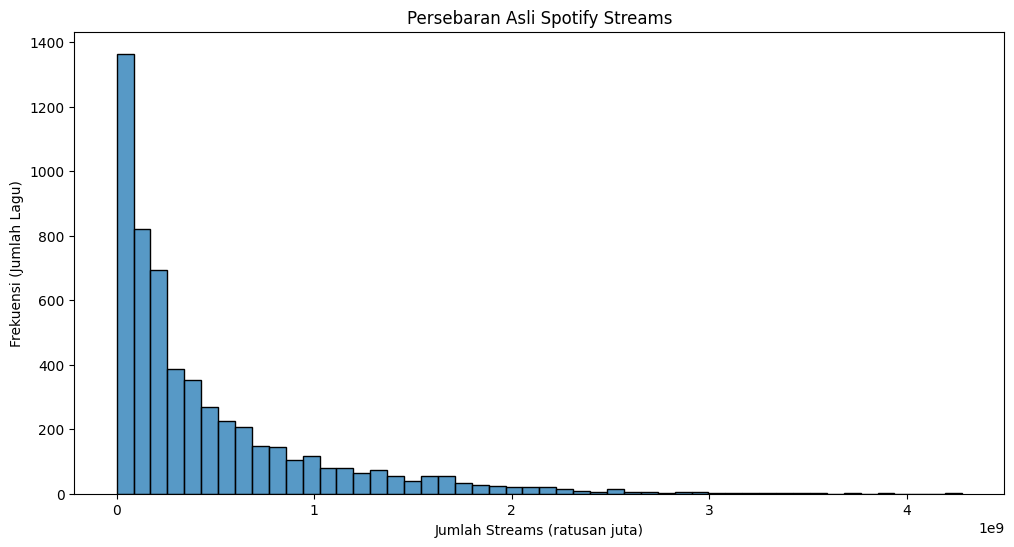

In [76]:
# Persebaran Asli Spotify Streams
plt.figure(figsize=(12, 6))
sns.histplot(df['spotify_streams'], bins=50, kde=False)
plt.title('Persebaran Asli Spotify Streams')
plt.xlabel('Jumlah Streams (ratusan juta)')
plt.ylabel('Frekuensi (Jumlah Lagu)')
plt.show()

In [77]:
import numpy as np

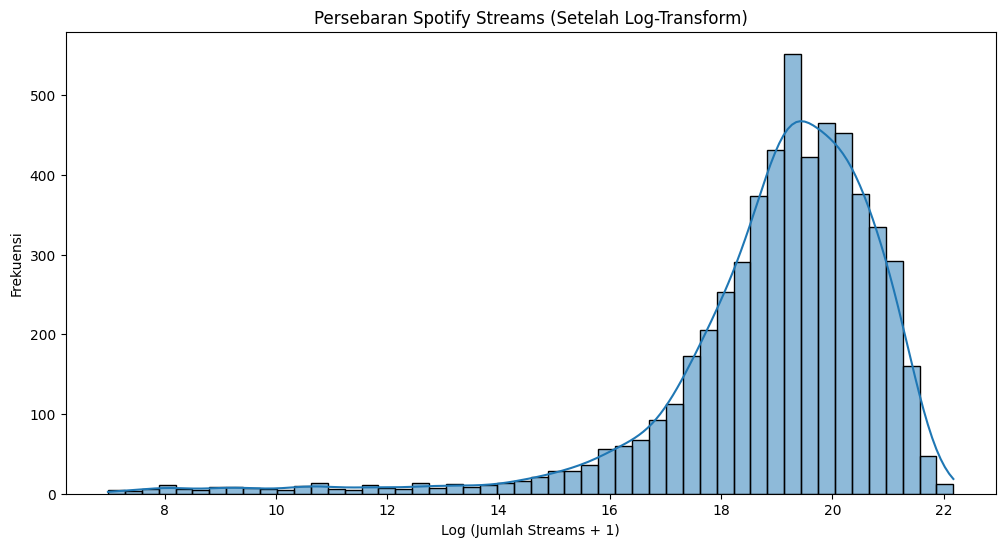

In [78]:
# Persebaran Log-Transformed (Untuk melihat persebaran lebih jelas)
# Kita menggunakan log1p untuk menghindari error jika ada nilai 0
df['log_streams'] = np.log1p(df['spotify_streams'])

plt.figure(figsize=(12, 6))
sns.histplot(df['log_streams'], bins=50, kde=True)
plt.title('Persebaran Spotify Streams (Setelah Log-Transform)')
plt.xlabel('Log (Jumlah Streams + 1)')
plt.ylabel('Frekuensi')
plt.show()

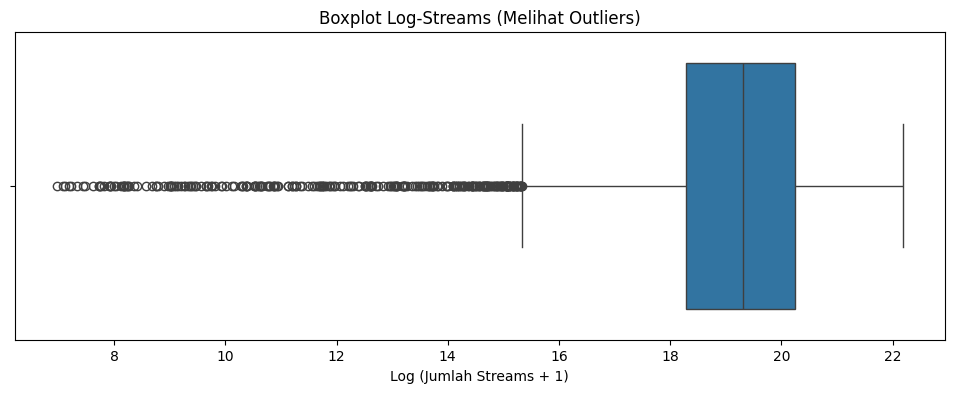

In [79]:
# Plot 3.3: Boxplot untuk melihat outliers
plt.figure(figsize=(12, 4))
sns.boxplot(x=df['log_streams'])
plt.title('Boxplot Log-Streams (Melihat Outliers)')
plt.xlabel('Log (Jumlah Streams + 1)')
plt.show()

C:\Users\sholikin\AppData\Local\Temp\ipykernel_29348\848500550.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_artists.index, x=top_artists.values, palette='viridis')


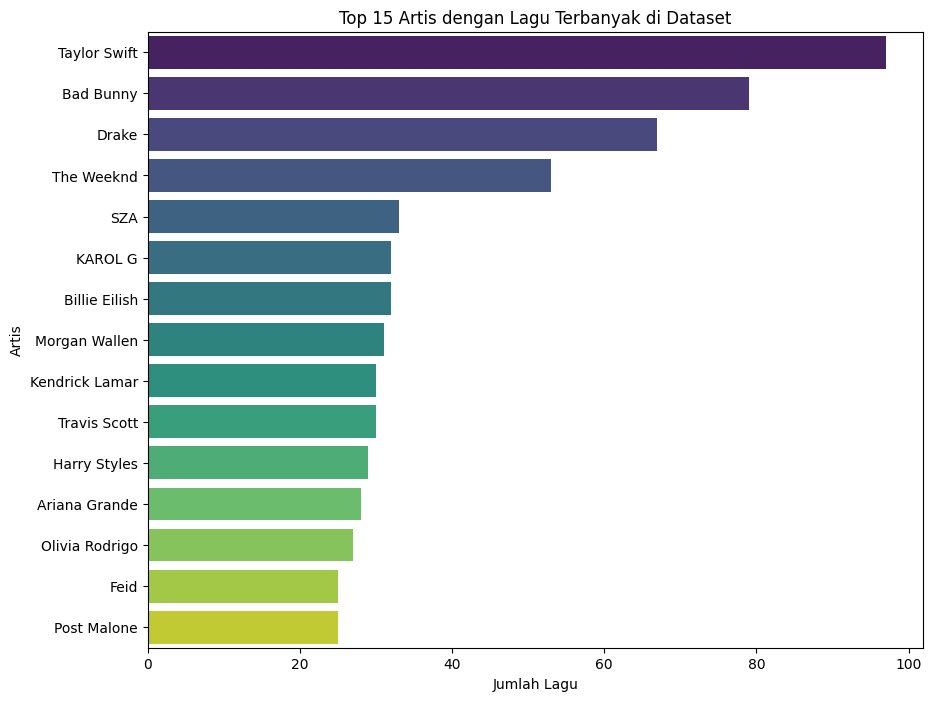

In [80]:
# ANALISIS DATA KATEGORIKAL / DISKRET
# Top 15 Artis dengan Lagu Terbanyak
plt.figure(figsize=(10, 8))
top_artists = df['artist'].value_counts().nlargest(15)
sns.barplot(y=top_artists.index, x=top_artists.values, palette='viridis')
plt.title('Top 15 Artis dengan Lagu Terbanyak di Dataset')
plt.xlabel('Jumlah Lagu')
plt.ylabel('Artis')
plt.show()

C:\Users\sholikin\AppData\Local\Temp\ipykernel_29348\3793558281.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_recent, x='released_year', palette='mako')


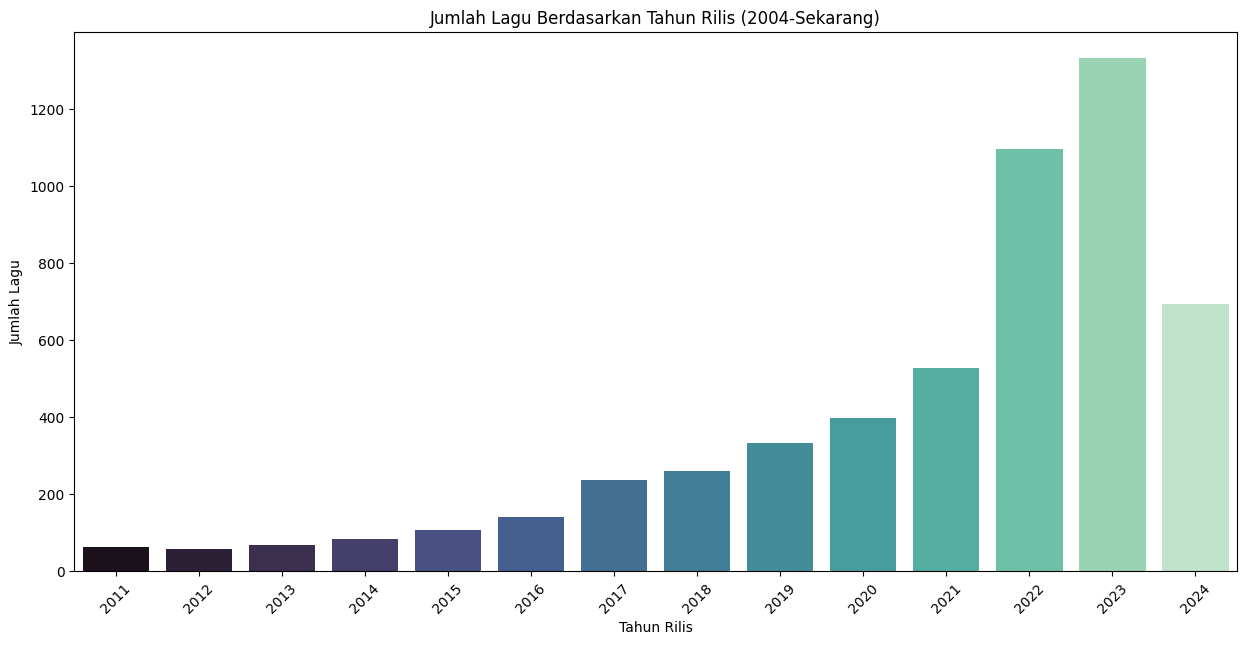

In [81]:
# Jumlah Lagu Berdasarkan Tahun Rilis (Hanya 20 tahun terakhir)
df['released_year'] = df['datetime'].dt.year
df_recent = df[df['released_year'] > 2010]
plt.figure(figsize=(15, 7))
sns.countplot(data=df_recent, x='released_year', palette='mako')
plt.title('Jumlah Lagu Berdasarkan Tahun Rilis (2004-Sekarang)')
plt.xlabel('Tahun Rilis')
plt.ylabel('Jumlah Lagu')
plt.xticks(rotation=45)
plt.show()

C:\Users\sholikin\AppData\Local\Temp\ipykernel_29348\2560406273.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='released_month', order=month_order, palette='mako')


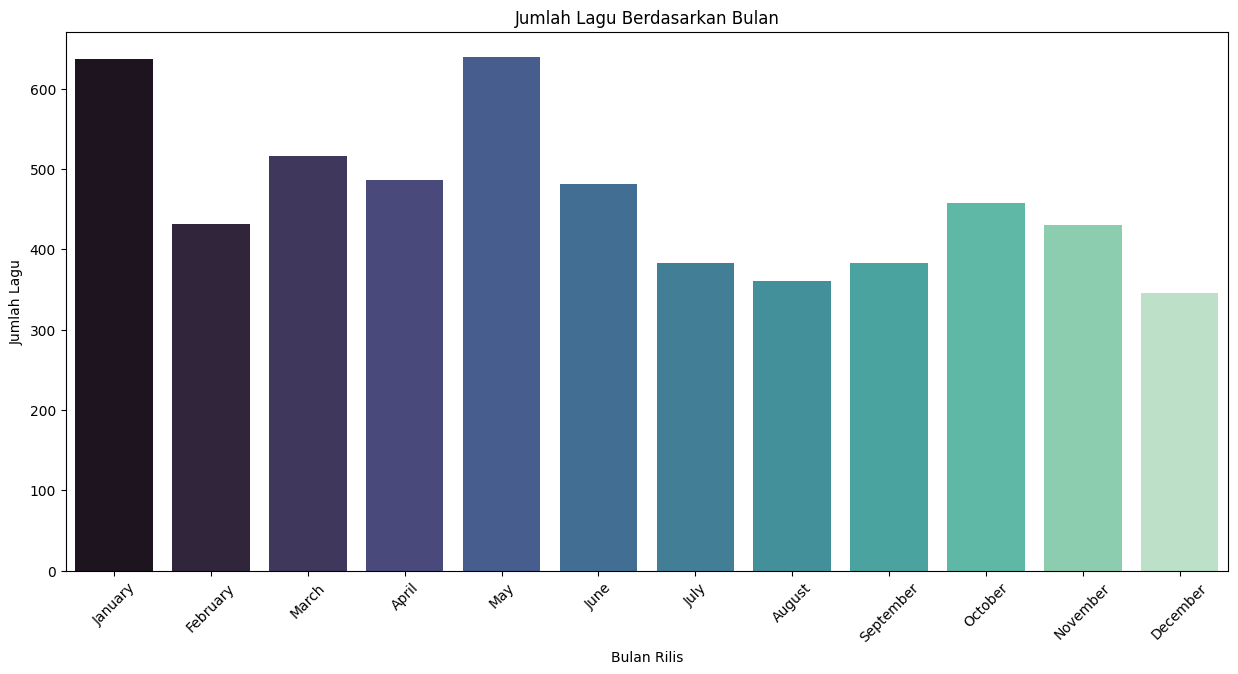

In [82]:
# Jumlah Lagu Berdasarkan Bulan
df['released_month'] = df['datetime'].dt.month_name()

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='released_month', order=month_order, palette='mako')
plt.title('Jumlah Lagu Berdasarkan Bulan')
plt.xlabel('Bulan Rilis')
plt.ylabel('Jumlah Lagu')
plt.xticks(rotation=45)
plt.show()

C:\Users\sholikin\AppData\Local\Temp\ipykernel_29348\2072420629.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='released_day', palette='mako')


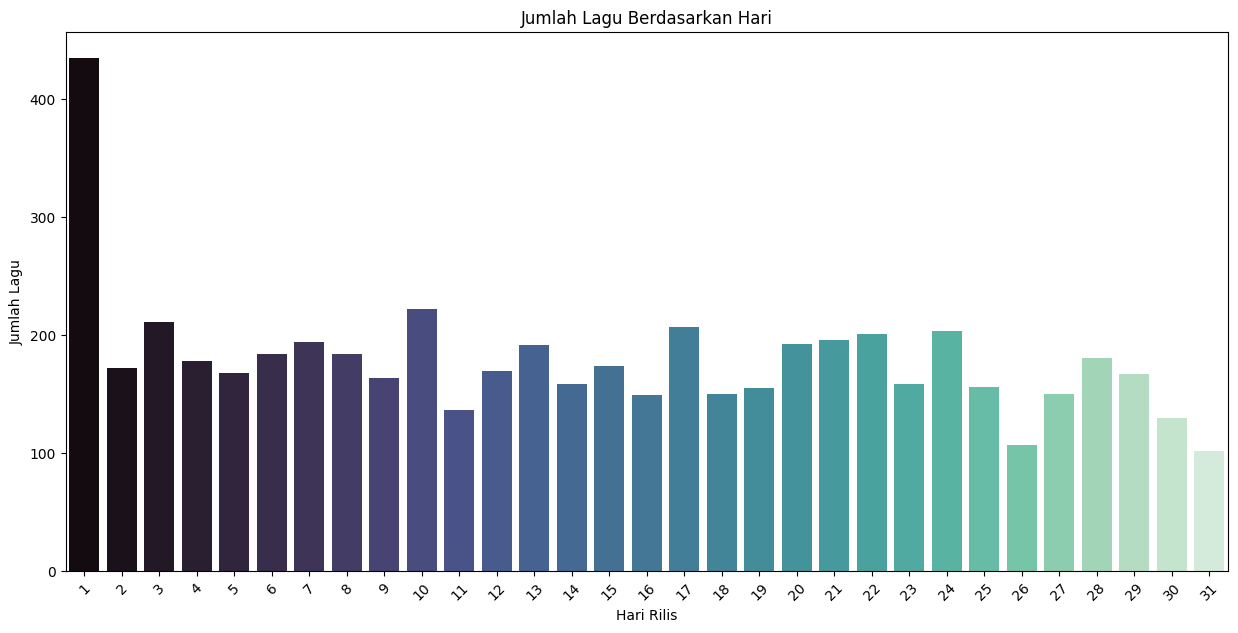

In [83]:
# Jumlah Lagu Berdasarkan Bulan
df['released_day'] = df['datetime'].dt.day

plt.figure(figsize=(15, 7))

sns.countplot(data=df, x='released_day', palette='mako')
plt.title('Jumlah Lagu Berdasarkan Hari')
plt.xlabel('Hari Rilis')
plt.ylabel('Jumlah Lagu')
plt.xticks(rotation=45)
plt.show()




In [84]:
artist_counts = df['artist'].value_counts()
artist_counts.head()
df['artist_split'] = df['artist'].str.split(', ')
all_artists = df.explode('artist_split')

artist_counts = all_artists['artist_split'].value_counts()
artist_counts.head()

artist_split
Taylor Swift      101
Bad Bunny         100
Drake              82
The Weeknd         68
Kendrick Lamar     41
Name: count, dtype: int64

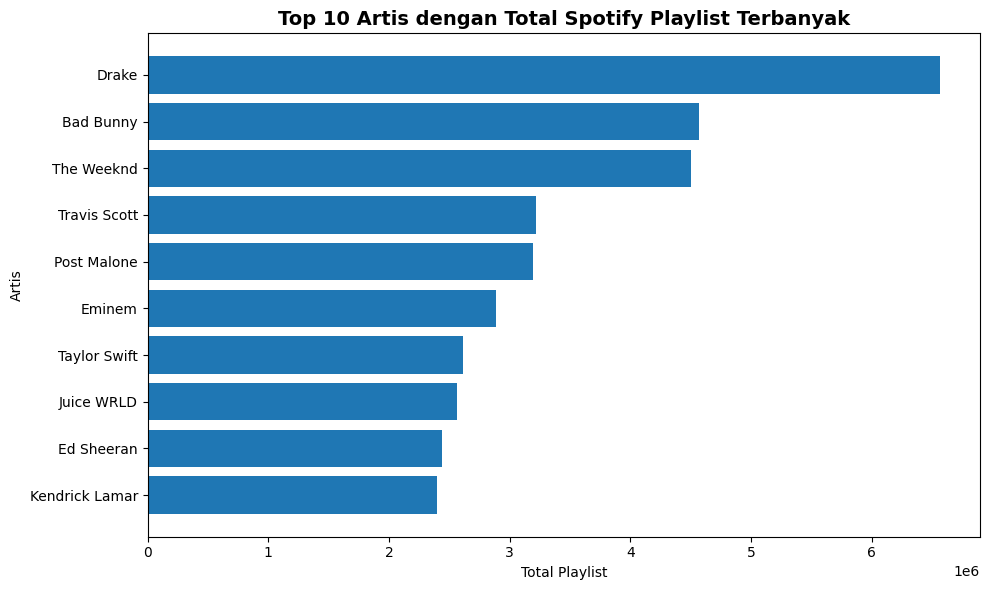

In [85]:
playlist_artist = all_artists.groupby('artist_split')['spotify_playlist'].sum().sort_values(ascending=False)
top_playlist = playlist_artist.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_playlist.index, top_playlist.values)
plt.gca().invert_yaxis()
plt.title("Top 10 Artis dengan Total Spotify Playlist Terbanyak", fontsize=14, weight="bold")
plt.xlabel("Total Playlist")
plt.ylabel("Artis")
plt.tight_layout()
plt.show()


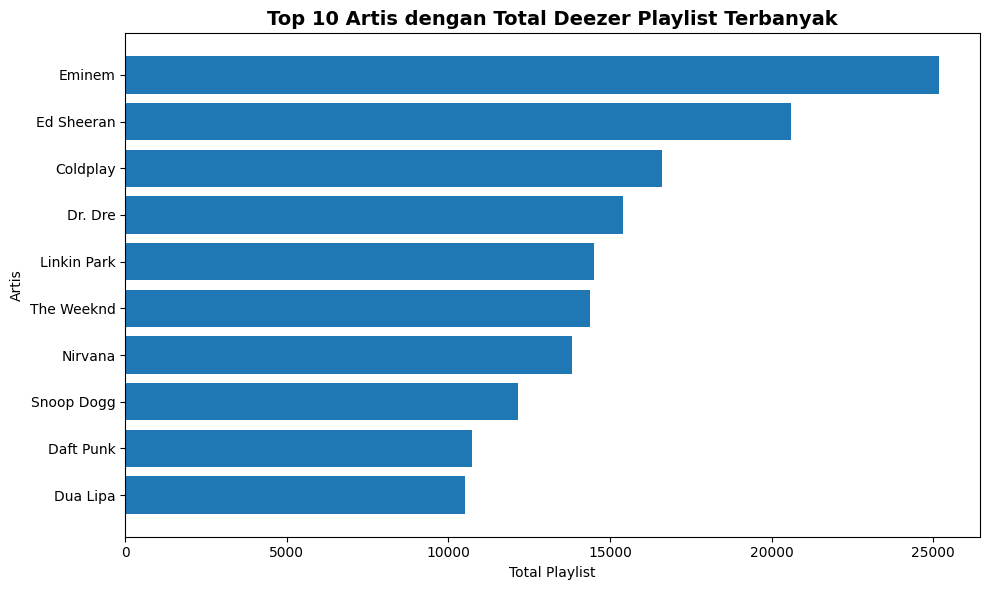

In [86]:
playlist_artist = all_artists.groupby('artist_split')['deezer_playlist'].sum().sort_values(ascending=False)
top_playlist = playlist_artist.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_playlist.index, top_playlist.values)
plt.gca().invert_yaxis()
plt.title("Top 10 Artis dengan Total Deezer Playlist Terbanyak", fontsize=14, weight="bold")
plt.xlabel("Total Playlist")
plt.ylabel("Artis")
plt.tight_layout()
plt.show()

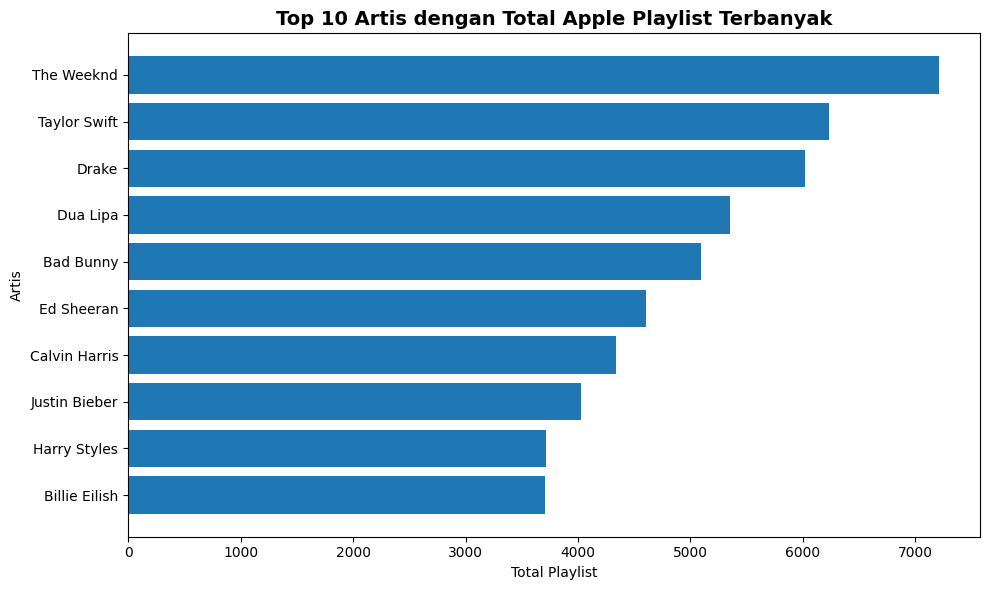

In [87]:
playlist_artist = all_artists.groupby('artist_split')['apple_playlist'].sum().sort_values(ascending=False)
top_playlist = playlist_artist.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_playlist.index, top_playlist.values)
plt.gca().invert_yaxis()
plt.title("Top 10 Artis dengan Total Apple Playlist Terbanyak", fontsize=14, weight="bold")
plt.xlabel("Total Playlist")
plt.ylabel("Artis")
plt.tight_layout()
plt.show()

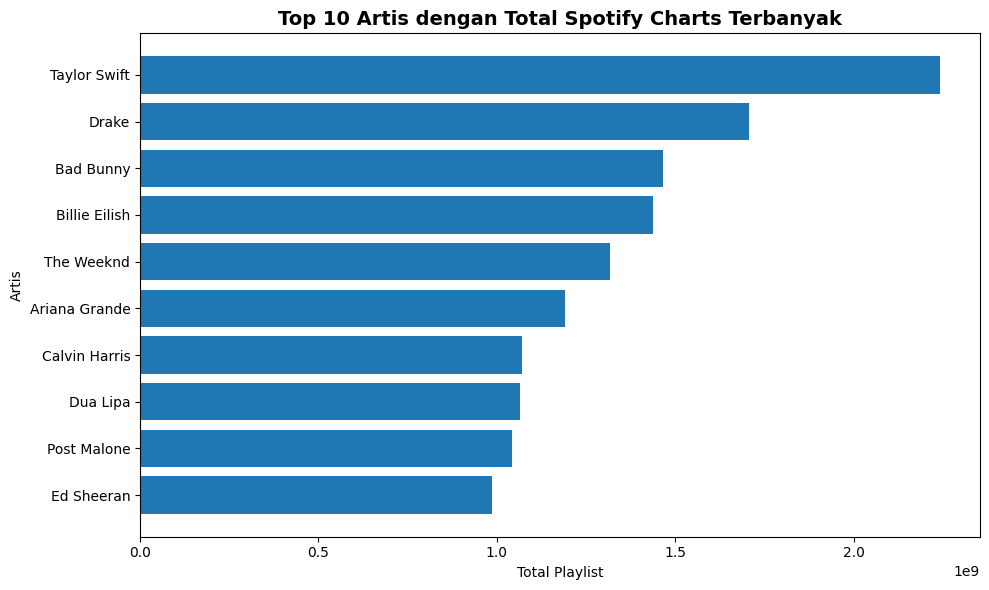

In [88]:
playlist_artist = all_artists.groupby('artist_split')['spotify_charts'].sum().sort_values(ascending=False)
top_playlist = playlist_artist.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_playlist.index, top_playlist.values)
plt.gca().invert_yaxis()
plt.title("Top 10 Artis dengan Total Spotify Charts Terbanyak", fontsize=14, weight="bold")
plt.xlabel("Total Playlist")
plt.ylabel("Artis")
plt.tight_layout()
plt.show()

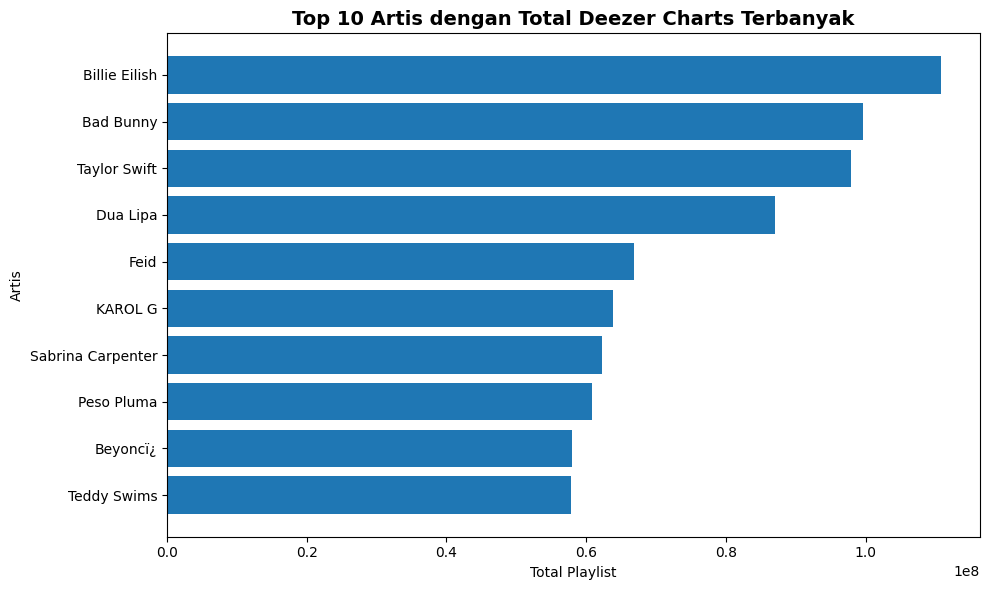

In [89]:
playlist_artist = all_artists.groupby('artist_split')['deezer_charts'].sum().sort_values(ascending=False)
top_playlist = playlist_artist.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_playlist.index, top_playlist.values)
plt.gca().invert_yaxis()
plt.title("Top 10 Artis dengan Total Deezer Charts Terbanyak", fontsize=14, weight="bold")
plt.xlabel("Total Playlist")
plt.ylabel("Artis")
plt.tight_layout()
plt.show()

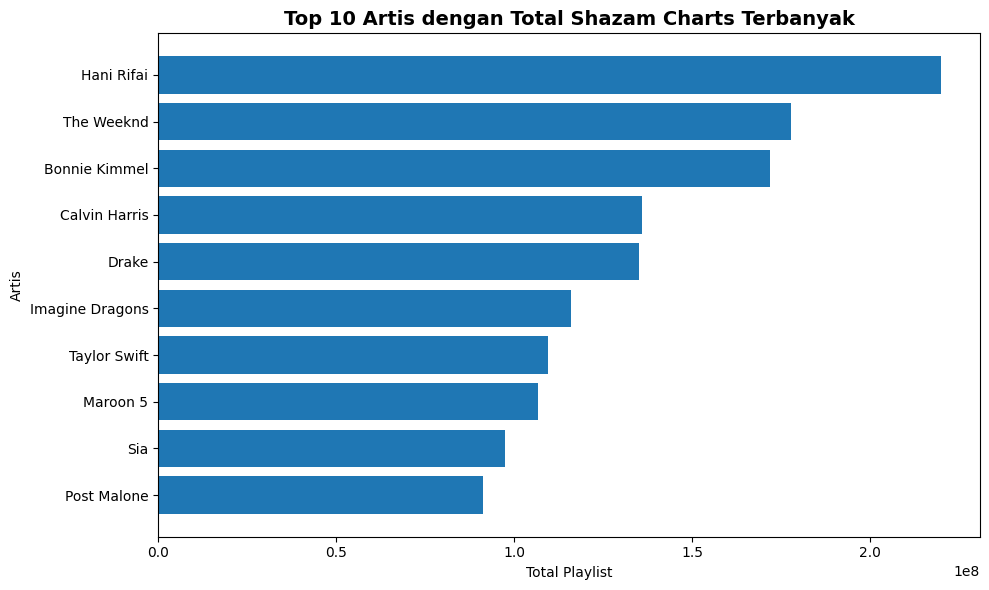

In [90]:
playlist_artist = all_artists.groupby('artist_split')['shazam_charts'].sum().sort_values(ascending=False)
top_playlist = playlist_artist.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_playlist.index, top_playlist.values)
plt.gca().invert_yaxis()
plt.title("Top 10 Artis dengan Total Shazam Charts Terbanyak", fontsize=14, weight="bold")
plt.xlabel("Total Playlist")
plt.ylabel("Artis")
plt.tight_layout()
plt.show()

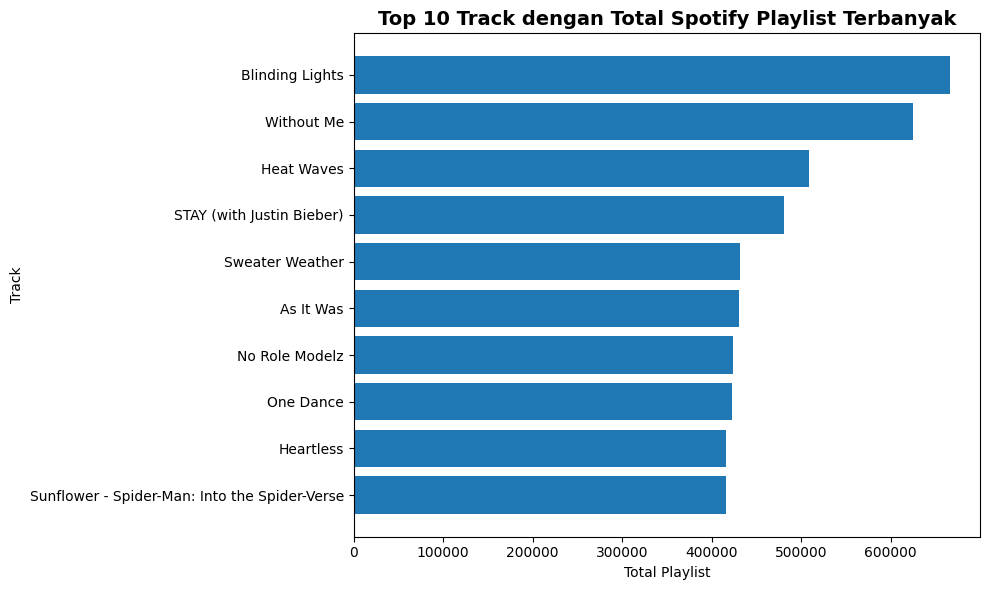

In [91]:
playlist_track = df.groupby('track')['spotify_playlist'].sum().sort_values(ascending=False)

top_playlist_tracks = playlist_track.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_playlist_tracks.index, top_playlist_tracks.values)
plt.gca().invert_yaxis()
plt.title("Top 10 Track dengan Total Spotify Playlist Terbanyak", fontsize=14, weight="bold")
plt.xlabel("Total Playlist")
plt.ylabel("Track")
plt.tight_layout()
plt.show()

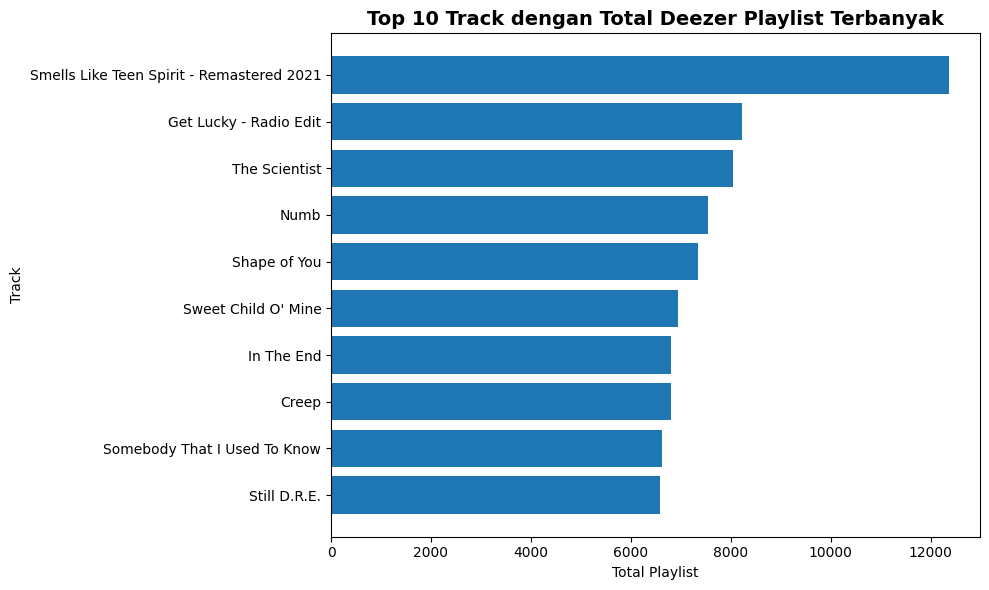

In [92]:
playlist_track = df.groupby('track')['deezer_playlist'].sum().sort_values(ascending=False)

top_playlist_tracks = playlist_track.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_playlist_tracks.index, top_playlist_tracks.values)
plt.gca().invert_yaxis()
plt.title("Top 10 Track dengan Total Deezer Playlist Terbanyak", fontsize=14, weight="bold")
plt.xlabel("Total Playlist")
plt.ylabel("Track")
plt.tight_layout()
plt.show()

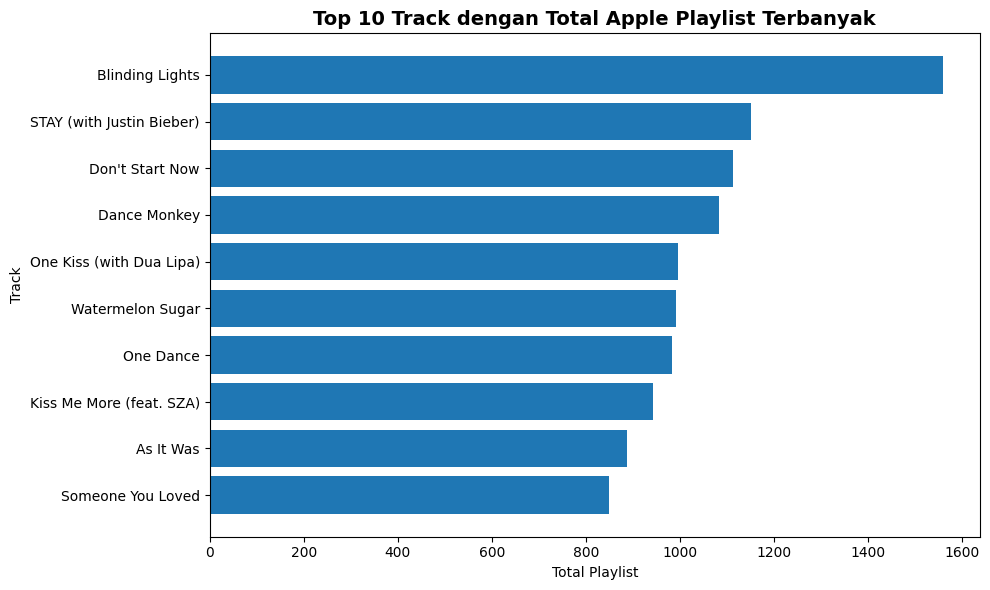

In [93]:
playlist_track = df.groupby('track')['apple_playlist'].sum().sort_values(ascending=False)

top_playlist_tracks = playlist_track.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_playlist_tracks.index, top_playlist_tracks.values)
plt.gca().invert_yaxis()
plt.title("Top 10 Track dengan Total Apple Playlist Terbanyak", fontsize=14, weight="bold")
plt.xlabel("Total Playlist")
plt.ylabel("Track")
plt.tight_layout()
plt.show()

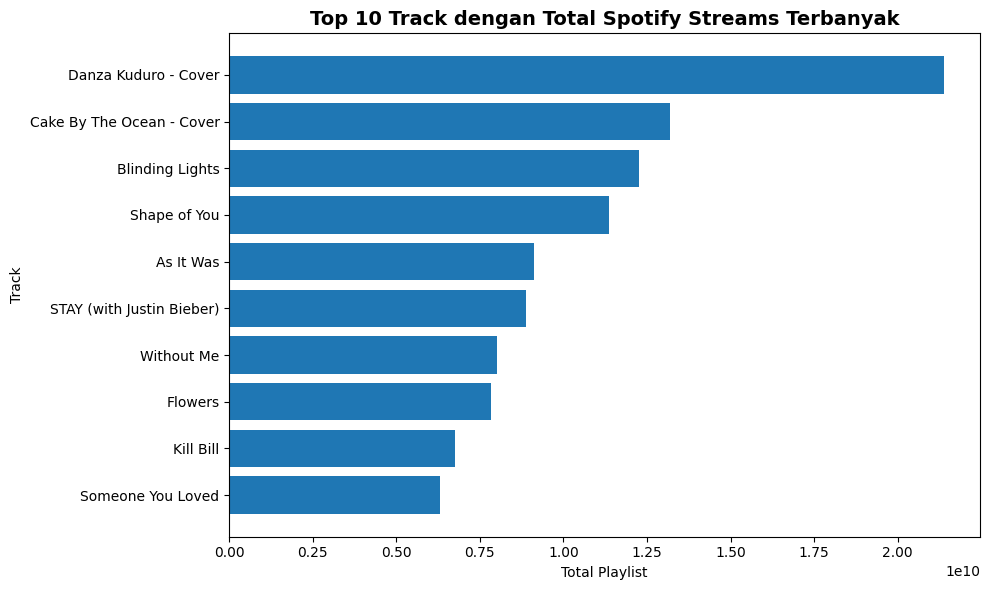

In [94]:
playlist_track = df.groupby('track')['spotify_streams'].sum().sort_values(ascending=False)

top_playlist_tracks = playlist_track.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_playlist_tracks.index, top_playlist_tracks.values)
plt.gca().invert_yaxis()
plt.title("Top 10 Track dengan Total Spotify Streams Terbanyak", fontsize=14, weight="bold")
plt.xlabel("Total Playlist")
plt.ylabel("Track")
plt.tight_layout()
plt.show()

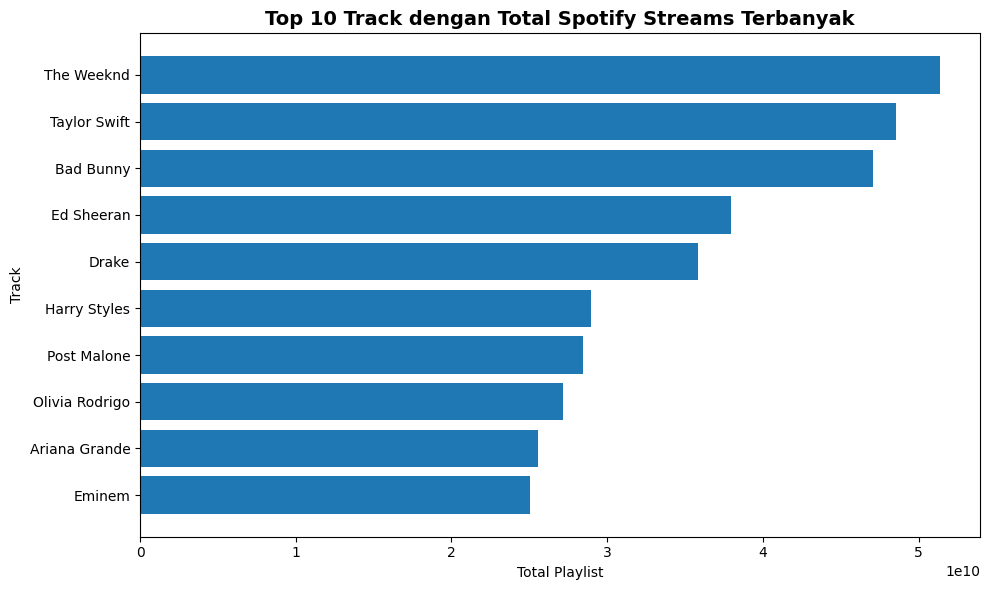

In [95]:
playlist_track = df.groupby('artist')['spotify_streams'].sum().sort_values(ascending=False)

top_playlist_tracks = playlist_track.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_playlist_tracks.index, top_playlist_tracks.values)
plt.gca().invert_yaxis()
plt.title("Top 10 Track dengan Total Spotify Streams Terbanyak", fontsize=14, weight="bold")
plt.xlabel("Total Playlist")
plt.ylabel("Track")
plt.tight_layout()
plt.show()

In [96]:
# ANALISIS HUBUNGAN (KORELASI)
numerical_cols = ['spotify_playlist', 'spotify_charts', 'spotify_streams',
                    'apple_playlist', 'deezer_playlist', 'deezer_charts',
                    'shazam_charts']

# Hitung matriks korelasi
corr_matrix = df[numerical_cols].corr()
print(corr_matrix)

                  spotify_playlist  spotify_charts  spotify_streams  \
spotify_playlist          1.000000        0.647354         0.685613   
spotify_charts            0.647354        1.000000         0.479248   
spotify_streams           0.685613        0.479248         1.000000   
apple_playlist            0.553418        0.519796         0.716877   
deezer_playlist           0.004865       -0.031090         0.312653   
deezer_charts             0.072118        0.513821         0.050854   
shazam_charts             0.454721        0.338520         0.361245   

                  apple_playlist  deezer_playlist  deezer_charts  \
spotify_playlist        0.553418         0.004865       0.072118   
spotify_charts          0.519796        -0.031090       0.513821   
spotify_streams         0.716877         0.312653       0.050854   
apple_playlist          1.000000         0.310893       0.189829   
deezer_playlist         0.310893         1.000000      -0.013197   
deezer_charts          

In [97]:
bygroupplaylist = df.groupby('track')[['spotify_playlist','apple_playlist','deezer_playlist','spotify_streams']].nunique()

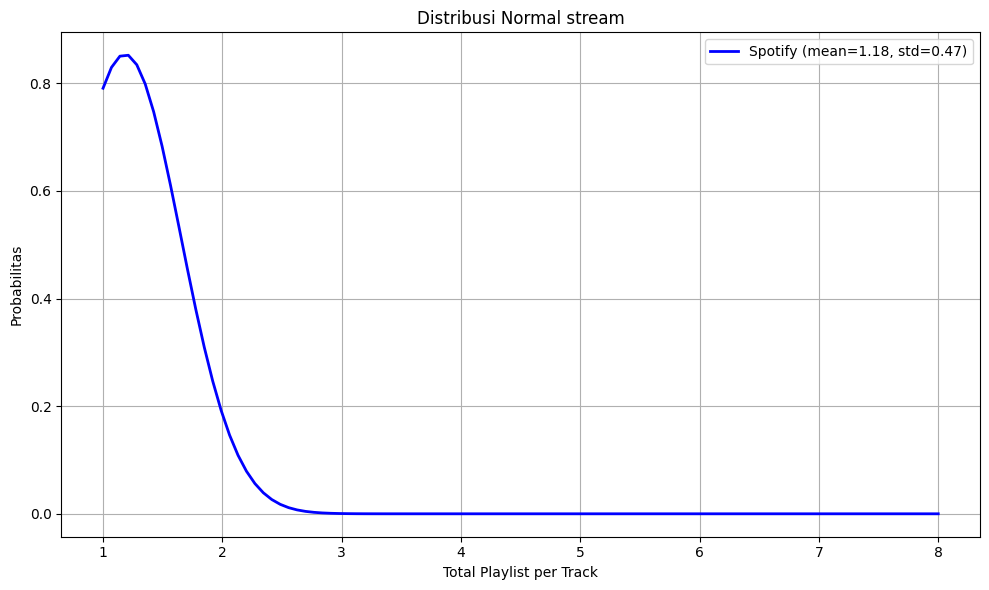

mean= 1.1828743545611016, std= 0.46725272891638325


In [98]:
# diagram normal
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

spotify_data = bygroupplaylist['spotify_streams']

plt.figure(figsize=(10,6))

mean = spotify_data.mean()
std = spotify_data.std()
x = np.linspace(spotify_data.min(), spotify_data.max(), 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y, linewidth=2, color='blue', label=f"Spotify (mean={mean:.2f}, std={std:.2f})")


plt.title('Distribusi Normal stream')
plt.xlabel('Total Playlist per Track')
plt.ylabel('Probabilitas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f'mean= {mean}, std= {std}')

In [99]:
# dalam tahun  ada berapa lagu yang rilis

df['year'] =df['datetime'].dt.year
df['year'].value_counts()


year
2023    1333
2022    1095
2024     693
2021     527
2020     397
2019     332
2018     259
2017     235
2016     141
2015     107
2014      83
2013      68
2011      61
2012      57
2010      34
2009      15
2008      13
2002      11
2004       9
2005       6
1999       6
2000       6
2007       6
2003       5
1984       4
2006       3
1991       3
1958       3
1963       3
1987       2
1982       2
1959       2
1998       2
1986       2
1970       2
1995       2
1957       2
1975       2
1985       2
1994       2
1996       1
1983       1
1992       1
1968       1
1997       1
1973       1
1971       1
1930       1
1942       1
1950       1
1979       1
1946       1
1952       1
2001       1
Name: count, dtype: int64

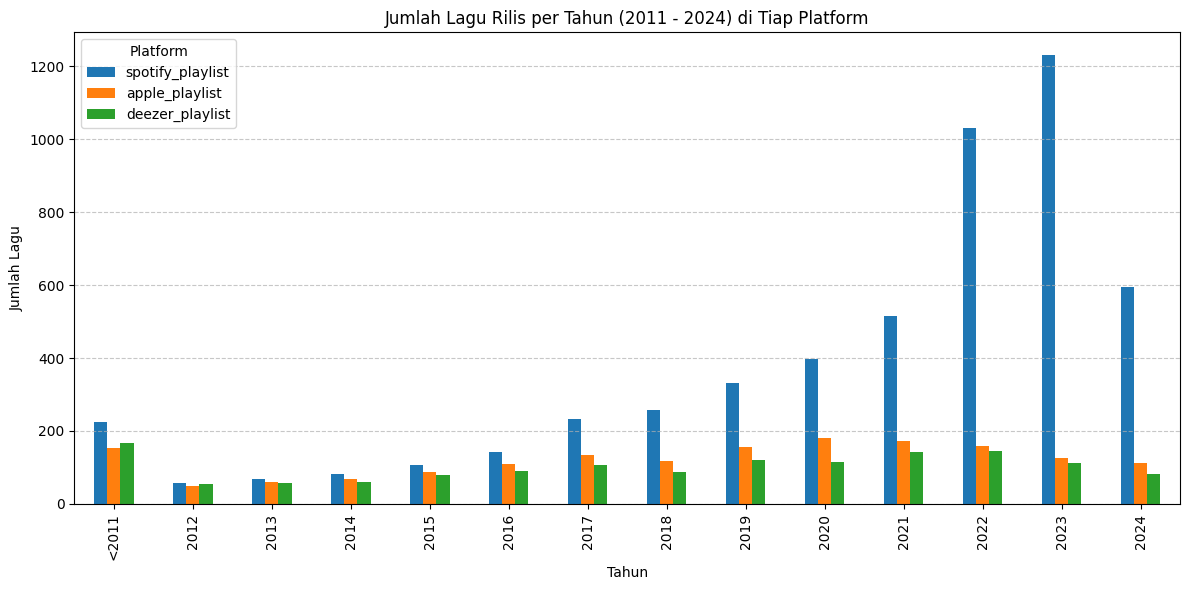

In [100]:
df = df[df['year'] <= 2024]

# Buat kategori tahun: "<2011" untuk semua tahun sebelum 2011
def year(x):
  if x <=2011:
    return '<2011'
  else:
    return x

df['year_group'] = df['year'].apply(year)


# Hitung jumlah lagu unik per platform per tahun
rilis_tahun = df.groupby('year_group')[['spotify_playlist', 'apple_playlist', 'deezer_playlist']].nunique()

# Urutkan tahun agar <2011 di depan
def rilis(y):
  if y == '<2011' :
    return -9999
  else:
    int(y)

def key(z):
  return z.map(rilis)

rilis_tahun = rilis_tahun.sort_index(key=key)


# Buat diagram batang
rilis_tahun.plot(kind='bar', figsize=(12,6))
plt.title('Jumlah Lagu Rilis per Tahun (2011 - 2024) di Tiap Platform')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Lagu')
plt.legend(title='Platform')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

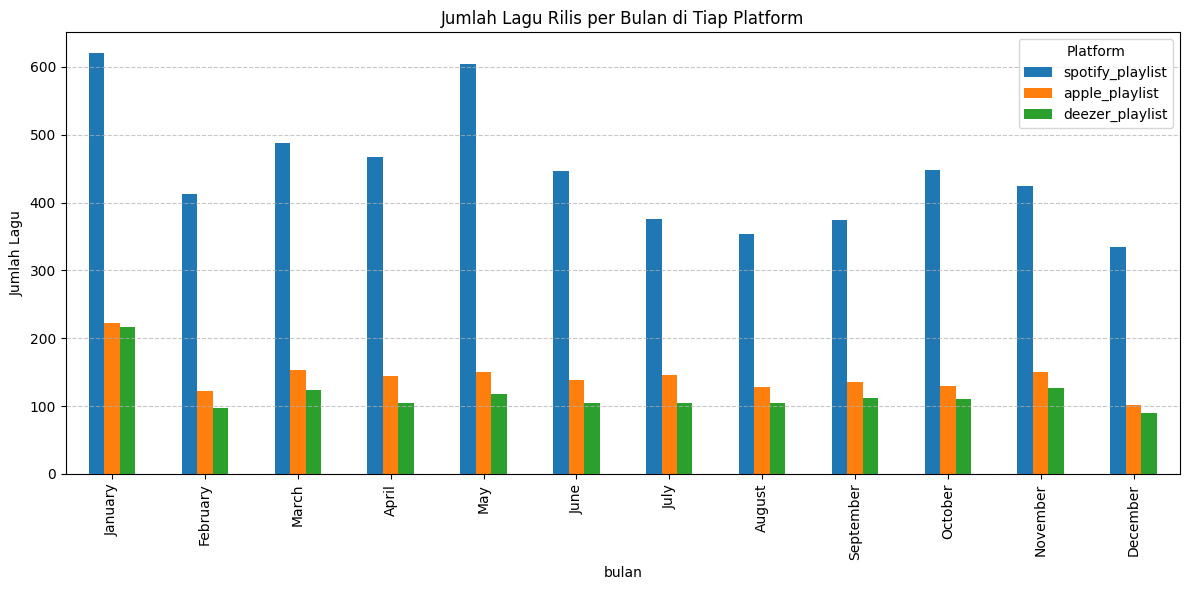

In [101]:
df['month'] =df['datetime'].dt.month_name()
df['month'].value_counts()



# Hitung jumlah lagu unik per platform per tahun
rilis_bulan = df.groupby('month')[['spotify_playlist', 'apple_playlist', 'deezer_playlist']].nunique()
bulan_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
rilis_bulan = rilis_bulan.reindex(bulan_order)



# Buat diagram batang
rilis_bulan.plot(kind='bar', figsize=(12,6))
plt.title('Jumlah Lagu Rilis per Bulan di Tiap Platform')
plt.xlabel('bulan')
plt.ylabel('Jumlah Lagu')
plt.legend(title='Platform')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



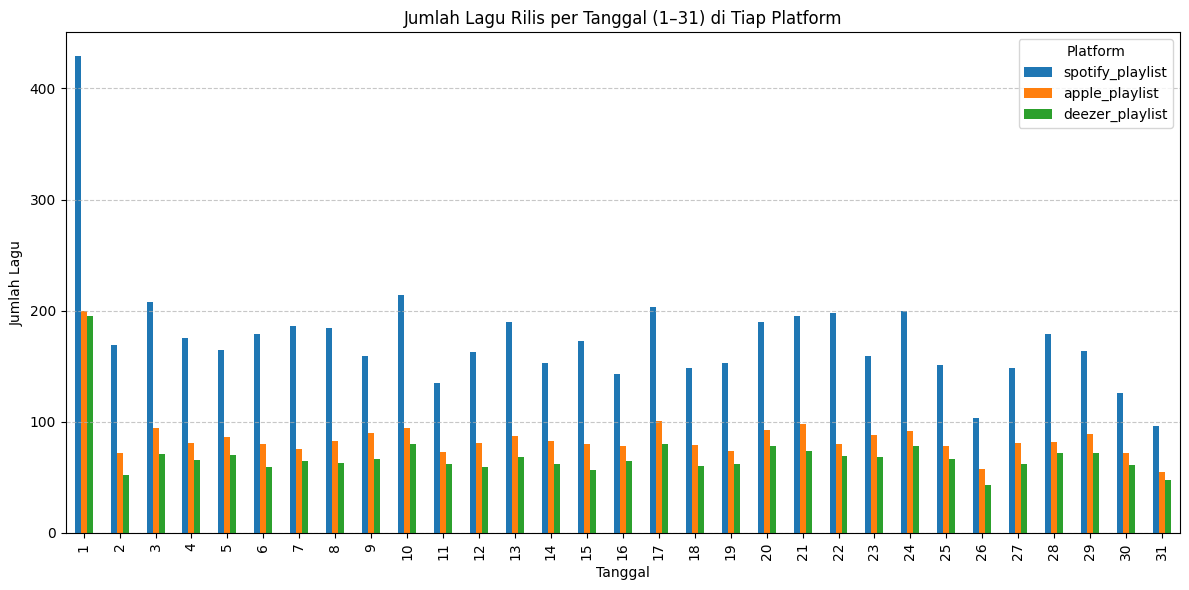

In [102]:
df['day'] = df['datetime'].dt.day
rilis_hari = df.groupby('day')[['spotify_playlist', 'apple_playlist', 'deezer_playlist']].nunique()

rilis_hari = rilis_hari.sort_index()

rilis_hari.plot(kind='bar', figsize=(12,6))
plt.title('Jumlah Lagu Rilis per Tanggal (1–31) di Tiap Platform')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Lagu')
plt.legend(title='Platform')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

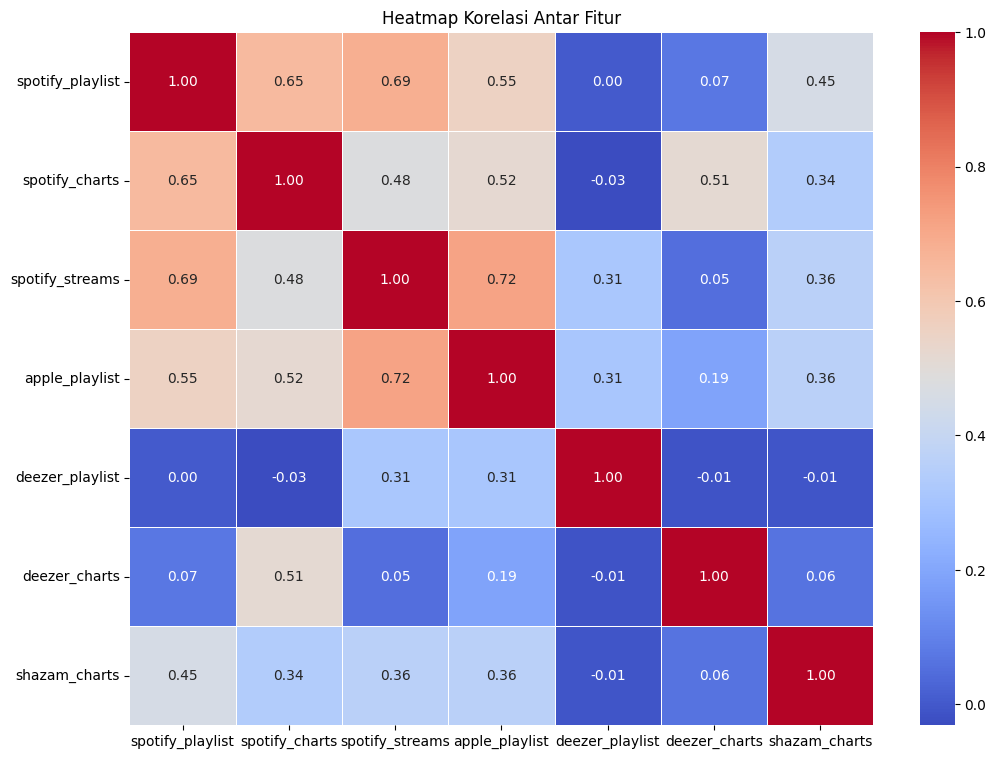

In [103]:
# Heatmap Korelasi
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()